In [1]:
#%matplotlib inline
from matplotlib import pyplot as plt
from math import sqrt

import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

Loading BokehJS ...

In [2]:
from IPython.html.widgets import interact
from bokeh.models import ColumnDataSource

/usr/local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



In [3]:
def production_function(x):
    return x**(1/2)

def cost_function(x):
    return x

def efficient_economic_surplus(x):
    return production_function(x) - cost_function(x)

# r = percentage share of landowner returns
# c = percentage share of landowner costs
def landowner_surplus(x,r,c):
    return (r*production_function(x)) - (c*cost_function(x))

def tenant_surplus(x,r,c):
    return ((1-r)*production_function(x)) - ((1-c)*cost_function(x))

# solve (r/2sqrt(x)) - c = 0
# ^ this gives you the value of x which maximizes the tenant's surplus function
def tenant_output(r,c):
    return min( ((1-r)/(2*(1-c)))**2, (r/(2*c))**2 ) 

In [4]:
def plot_function(f,p):
    return p.line(*zip(*[(x/1000,f(x/1000)) for x in range(0,1000)]))

In [10]:
p = figure(title="Input Cost Sharing")
plot_function(production_function,p)
plot_function(cost_function,p)
plot_function(efficient_economic_surplus,p)

source = ColumnDataSource(data=dict(x=[x/1000 for x in range(0,1000)], y=[landowner_surplus(x,0.5,0.5)/1000 for x in range(0,1000)],
                                    x2=[x/1000 for x in range(0,1000)],y2=[tenant_surplus(x,0.5,0.5)/1000 for x in range(0,1000)]))
p.line(source.data["x"],source.data["y"],source=source,color="red",name="1")
p.line(source.data["x2"],source.data["y2"],source=source,color="green",name="2")

In [6]:
def update(r,c):
    source.data['y'] = [landowner_surplus(x,r,c) for x in source.data['x']]
    source.data['y2'] = [tenant_surplus(x,r,c) for x in source.data['x2']]
    source.push_notebook()

In [7]:
show(p)

In [8]:
interact(update, c=(0,1,.01),r=(0,1,.01))

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: BokehDeprecationWarning:

bokeh.models.sources.push_notebook was deprecated in Bokeh 0.11.0; please use bokeh.io.push_notebook instead



612.5625
612.5625 0.99 0.01


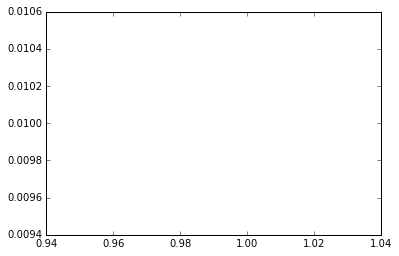

In [9]:


n = 100
points = []
for r in range(1,n):
    for c in range(1,n):
        points.append((tenant_output(r/n,c/n),r/n,c/n))
        #print(tenant_output(r/n,c/n))

xs,_,_ = zip(*points)
max_x = max(xs)

print(max_x)
points_used = []
for x,r,c in points:
    if x == max_x:
        print(x,r,c)
        points_used.append((r,c))

plt.plot(*zip(*[(x,y) for x,y in points_used]))

In [10]:
# from utility function ipynb
def graph3DFunction(f, title="Output as function of r and c"):
    x = y = np.arange(0,1,0.01)
    yt = x[:,np.newaxis]

    z=[]
    for i in x:
        z.append([f(i,j) for j in y])
    print(type(z))
    layout = go.Layout(
        title=title,
        scene = dict(
           xaxis = dict(title = "c"), 
           yaxis = dict(title = "r"), 
           zaxis = dict(title = "Output"))
    )
    data = go.Data([ go.Surface( x=x, y=y, z=z ) ])
    print(data)
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename=title, validate=False)

In [11]:
graph3DFunction(tenant_output)

<class 'list'>
[{'type': 'surface', 'z': [[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [inf, 0.0625, 0.015625, 0.0069444444444444458, 0.00390625, 0.0024999999999999996, 0.0017361111111111114, 0.0012755102040816326, 0.0009765625, 0.000771604938271605, 0.0006249999999999999, 0.00051652892561983473, 0.00043402777777777786, 0.00036982248520710064, 0.00031887755102040814, 0.00027777777777777778, 0.000244140625, 0.00021626297577854672, 0.00019290123456790125, 0.00017313019390581715, 0.00015624999999999998, 0.00014172335600907033, 0.00012913223

In [5]:
landowner_surplus(0.1849,0.57,0.5)+tenant_surplus(0.1849,0.57,0.5)

0.24509999999999998

In [45]:
#%matplotlib osx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
n = 100
points = []
for r in range(1,n):
    for c in range(1,n):
        points.append((tenant_output(r/n,c/n),r/n,c/n))
        if tenant_output(r/n,c/n) < 0:
            print("Hello")
        #print(tenant_output(r/n,c/n))

points_used = []
for x,r,c in points:
    #if landowner_surplus(x,r,c) <= 1:
    points_used.append((r,c,landowner_surplus(x,r,c)))

title = "Testing"
xs,ys,zs = zip(*points_used)
data = go.Data([ go.Surface( x=np.array(xs), y=np.array(ys), z=np.array(zs) ) ])
layout = go.Layout(
        title=title
    )

print(min(xs),max(xs))
print(min(ys),max(ys))
print(min(zs),max(zs))
print(len(xs),len(ys),len(zs))
mz = zs.index(max(zs))
print(xs[mz],ys[mz],zs[mz])
print(xs[4900],ys[4900],zs[4900])
print(xs[4897],ys[4897],zs[4897])
#print(ys)
#fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename=title)

#mplot3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs, ys, zs=zs)
#plt.show()

0.01 0.99
0.01 0.99
2.5252525252525256e-05 0.2475
9801 9801 9801
0.99 0.99 0.2475
0.5 0.5 0.125
0.5 0.47 0.1312744749021004


In [40]:
tenant_output(0.99,0.99)

0.25

In [11]:
r = 0.58
c = 0.53
tenant_output(r,c)

0.2993948024207903

In [23]:
r = 0.42
c = 0.4
tenant_output(r,c)

0.23361111111111116

In [27]:
tenant_output(0.01,0.99)

2450.249999999996

In [41]:
import pandas as pd

In [46]:
pd.DataFrame({'x':xs,'y':ys,'z':zs}).to_csv("sharecrop_data.csv")